# Todo:
* Parallelise where evr possible
* using category2

## Pipeline

In [21]:
import pandas as pd 
import os
import glob
from sklearn.model_selection import train_test_split
from datetime import datetime

# Mac local path
root_path =  r'/Users/krish/ljmu/1.data/afo/'

In [22]:
len(glob.glob(root_path+'images/*.jpg'))

3641

### Using the train csv to tile and train 

In [23]:
from pathlib import Path
from PIL import Image
import numpy as np
from shapely.geometry import Polygon, Point

In [24]:
all_images = pd.read_csv(root_path+'images/all_images_category2.csv')

In [25]:
all_images

,Unnamed: 0,file_name,humans,number_of_humans
0,0,/Users/krish/ljmu/1.data/afo/images/b1_37.jpg,1,34
1,1,/Users/krish/ljmu/1.data/afo/images/r2_94.jpg,1,3
2,2,/Users/krish/ljmu/1.data/afo/images/b1_23.jpg,1,35
3,3,/Users/krish/ljmu/1.data/afo/images/r2_80.jpg,1,3
4,4,/Users/krish/ljmu/1.data/afo/images/s5_5.jpg,0,0
...,...,...,...,...
3636,3636,/Users/krish/ljmu/1.data/afo/images/a_184.jpg,1,5
3637,3637,/Users/krish/ljmu/1.data/afo/images/s5_8.jpg,0,0
3638,3638,/Users/krish/ljmu/1.data/afo/images/s2_107.jpg,1,1
3639,3639,/Users/krish/ljmu/1.data/afo/images/a_1184.jpg,1,46


In [26]:
train_df1, test_df = train_test_split(all_images, 
                                   test_size = 0.10, 
                                   random_state = 1998,
                                   stratify = all_images['humans']) # Stratify makes sure that the subset of training and testing data returned keeps the same class propotion of the main dataframe
print('train', train_df1.shape[0], 'validation', test_df.shape[0])

train 3276 validation 365


In [27]:
train_df, valid_df = train_test_split(train_df1, 
                                   test_size = 0.10, 
                                   random_state = 1998,
                                   stratify = train_df1['humans']) # Stratify makes sure that the subset of training and testing data returned keeps the same class propotion of the main dataframe
print('train', train_df.shape[0], 'validation', valid_df.shape[0])




train 2948 validation 328


## Model fitting

**Without tiling**

In [28]:
result_root = r'/Users/krish/ljmu/3.results/13122022-parallel-mobile-full_image-category2/'
Path(result_root).mkdir(parents=True, exist_ok=True)

In [29]:
from tensorflow.keras import layers
from keras_preprocessing.image import ImageDataGenerator

In [30]:
# actual_train = pd.read_csv(root_path+'images/train.csv')

In [31]:
# actual_train['humans'] = actual_train.humans.apply(lambda x: str(x))

In [32]:
import tensorflow as tf

from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [33]:
train_df

,Unnamed: 0,file_name,humans,number_of_humans
2336,2336,/Users/krish/ljmu/1.data/afo/images/b1_98.jpg,1,21
1922,1922,/Users/krish/ljmu/1.data/afo/images/k5_12.jpg,1,8
808,808,/Users/krish/ljmu/1.data/afo/images/k9_531.jpg,1,1
40,40,/Users/krish/ljmu/1.data/afo/images/s2_334.jpg,1,1
1895,1895,/Users/krish/ljmu/1.data/afo/images/g_54.jpg,1,2
...,...,...,...,...
524,524,/Users/krish/ljmu/1.data/afo/images/s5_207.jpg,0,0
3392,3392,/Users/krish/ljmu/1.data/afo/images/f_104.jpg,1,46
2248,2248,/Users/krish/ljmu/1.data/afo/images/w1_108.jpg,1,6
3509,3509,/Users/krish/ljmu/1.data/afo/images/k6_231.jpg,1,3


**using tiling data**

In [34]:
# df_true = pd.DataFrame(columns = ['file_name','humans'])
# df_false = pd.DataFrame(columns = ['file_name','humans'])

# df_true['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv4/train/ts/*.jpg')
# df_true.humans = 1

# df_false['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv4/train/false/*.jpg')
# df_false.humans = 0

# tiled_train = df_true.append(df_false)

In [35]:
# tiled_train['humans'] = tiled_train.humans.apply(lambda x: str(x))

In [36]:
# tiled_train

In [37]:
# train_df, valid_df = train_test_split(tiled_train, 
#                                    test_size = 0.15, 
#                                    random_state = 1998,
#                                    stratify = tiled_train['humans']) # Stratify makes sure that the subset of training and testing data returned keeps the same class propotion of the main dataframe
# print('train', train_df.shape[0], 'validation', valid_df.shape[0])

In [38]:
train_df['humans'] = train_df.humans.apply(lambda x: str(x))
valid_df['humans'] = valid_df.humans.apply(lambda x: str(x))

In [39]:
# Rotation_range - random rotation within the angle mentioned
# Random_shifts - shifts 20% at max. to the horizontal and vertical(reduce to 10% as already diverse data)
# Random_flip - random flips 
# fill_mode - fill the blank pixels, when augmenting with the nearest color
datagen = ImageDataGenerator(rotation_range = 360,
                             width_shift_range=0.1, height_shift_range=0.1,
                             #horizontal_flip=True, vertical_flip=True, # Isnt much useful for us
                             brightness_range=[0.5,1.5],
                             rescale=1./255.,fill_mode='nearest')

train_generator = datagen.flow_from_dataframe(dataframe=train_df, x_col = 'file_name', y_col = 'humans', class_mode='binary', target_size=(224 , 224), batch_size=24)
valid_generator = datagen.flow_from_dataframe(dataframe=valid_df, x_col = 'file_name', y_col = 'humans', class_mode='binary', target_size=(224 , 224), batch_size=24)

Found 2948 validated image filenames belonging to 2 classes.
Found 328 validated image filenames belonging to 2 classes.


In [40]:
# i'll be using inception_v3 for this model , along with 2 extra dense layers and the output layer
# (224,224,3) is the default shape for imagent and that actually cant bechanged
mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(224 , 224, 3),
                                           include_top=False, 
                                           weights='imagenet')

model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))

model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))

model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))



model.add(Dense(1, activation="sigmoid" , name="classification"))

Metal device set to: Apple M1


2022-12-13 12:20:34.010978: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-13 12:20:34.011469: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [41]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.004,momentum=0.9), 
            loss='BinaryCrossentropy',
            metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 1024)              5

In [42]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta = 0.5)

In [43]:
class_weight = {0:train_df['humans'].value_counts()[0]/train_df.shape[0],1:train_df['humans'].value_counts()[1]/train_df.shape[0],}

In [44]:
history = model.fit(train_generator, validation_data = valid_generator, epochs = 10, class_weight=class_weight,callbacks=[es])


Epoch 1/10


2022-12-13 12:20:38.384097: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-13 12:20:39.006725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


123/123 [==============================] - ETA: 0s - loss: 0.1590 - accuracy: 0.7771

2022-12-13 12:22:57.768253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


123/123 [==============================] - 155s 1s/step - loss: 0.1590 - accuracy: 0.7771 - val_loss: 0.3321 - val_accuracy: 0.8415
Epoch 2/10
123/123 [==============================] - 152s 1s/step - loss: 0.0898 - accuracy: 0.8562 - val_loss: 0.2976 - val_accuracy: 0.8537
Epoch 3/10
123/123 [==============================] - 156s 1s/step - loss: 0.0733 - accuracy: 0.8721 - val_loss: 0.3355 - val_accuracy: 0.8415
Epoch 4/10
123/123 [==============================] - 153s 1s/step - loss: 0.0693 - accuracy: 0.8816 - val_loss: 0.3318 - val_accuracy: 0.8323


In [45]:
now = datetime.now()
date_time = now.strftime("%d%m%Y-%H%M")
model_save_dir = result_root+date_time+'-mobilenet+notile+augmentation_10epochs_afo_500X500_category2'
model.save(model_save_dir)

INFO:tensorflow:Assets written to: /Users/krish/ljmu/3.results/13122022-parallel-mobile-full_image-category2/13122022-1230-mobilenet+notile+augmentation_10epochs_afo_500X500_category2/assets


INFO:tensorflow:Assets written to: /Users/krish/ljmu/3.results/13122022-parallel-mobile-full_image-category2/13122022-1230-mobilenet+notile+augmentation_10epochs_afo_500X500_category2/assets


**I am not sure how I got 75 auc score for model 1. The paper got only 40ish. maybe is it because of any augmentation at all** 
#### Model3 without any augmentation

## Metrics


In [46]:
import multiprocessing
from joblib import Parallel, delayed
num_cores = multiprocessing.cpu_count()
import matplotlib.pyplot as plt

In [47]:
# slice_size = 500
# newpath = '/Users/krish/ljmu/1.data/afo/tiledv4/test/ts/'

# falsepath = '/Users/krish/ljmu/1.data/afo/tiledv4/test/false/'
# #creating a new directory called pythondirectory
# Path(newpath).mkdir(parents=True, exist_ok=True)
# Path(falsepath).mkdir(parents=True, exist_ok=True)

# def tiler3(imname):
#     im = Image.open(imname)
#     imr = np.array(im, dtype=np.uint8)
#     height = imr.shape[0]
#     width = imr.shape[1]
#     labname = imname.split('/')[-1].replace('.jpg', '.txt')
#     labels = pd.read_csv(root_path+'2categories/'+labname, sep=' ', names=['class', 'x1', 'y1', 'w', 'h'])
#     labels = labels[labels['class']==0] # Only taking into consideration small objects
    
#     # we need to rescale coordinates from 0-1 to real image height and width
#     labels[['x1', 'w']] = labels[['x1', 'w']] * width
#     labels[['y1', 'h']] = labels[['y1', 'h']] * height
    
#     boxes = []
#     #print(labels)
#     # convert bounding boxes to shapely polygons. We need to invert Y and find polygon vertices from center points
#     for row in labels.iterrows():
#         x1 = row[1]['x1'] - row[1]['w']/2
#         y1 = (height - row[1]['y1']) - row[1]['h']/2
#         x2 = row[1]['x1'] + row[1]['w']/2
#         y2 = (height - row[1]['y1']) + row[1]['h']/2

#         boxes.append((int(row[1]['class']), Polygon([(x1, y1), (x2, y1), (x2, y2), (x1, y2)])))
    
#     counter = 0
#     print('Image:', imname)
#     # create tiles and find intersection with bounding boxes for each tile
#     fig, axs = plt.subplots((height // slice_size)+int(bool(height%slice_size)),(width // slice_size)+int(bool(width%slice_size)))    
#     for i in range((height // slice_size)+int(bool(height%slice_size))):
#         for j in range((width // slice_size)+int(bool(width%slice_size))):
            
#             if (i == (height // slice_size)) and (j != (width//slice_size)):
#                 sliced = imr[height - slice_size:height, j*slice_size:(j+1)*slice_size]
#                 x1 = width - slice_size
#                 y1 = height - (i*slice_size)
#                 x2 = width
#                 y2 = (height - (i+1)*slice_size) + 1
                
#             elif (i != (height // slice_size)) and (j == (width//slice_size)):
#                 sliced = imr[i*slice_size:(i+1)*slice_size, width - slice_size:width]
#                 x1 = j*slice_size
#                 y1 = height - (height - slice_size)
#                 x2 = ((j+1)*slice_size) - 1
#                 y2 = 0
                
#             elif (i == (height // slice_size)) and (j == (width//slice_size)):
#                 sliced = imr[height - slice_size:height, width - slice_size:width]
#                 x1 = width - slice_size
#                 y1 = height - (height - slice_size)
#                 x2 = width
#                 y2 = 0
            
#             elif (i != (height // slice_size)) and (j != (width//slice_size)) :
#                 sliced = imr[i*slice_size:(i+1)*slice_size, j*slice_size:(j+1)*slice_size]
#                 x1 = j*slice_size
#                 y1 = height - (i*slice_size)
#                 x2 = ((j+1)*slice_size) - 1
#                 y2 = (height - (i+1)*slice_size) + 1
            
#             pol = Polygon([(x1, y1), (x2, y1), (x2, y2), (x1, y2)])
#             imsaved = False
#             slice_labels = []
            
            
            
#             for box in boxes:
#                 if pol.intersects(box[1]):
#                     inter = pol.intersection(box[1])        
                    
#                     if not imsaved:
                      
#                         sliced_im = Image.fromarray(sliced)
#                         filename = imname.split('/')[-1]
#                         ##filename = imname
#                         slice_path = newpath + filename.replace('.jpg', f'_{i}_{j}.jpg')
                        
#                         slice_labels_path = newpath + filename.replace('.jpg', f'_{i}_{j}.txt')
                        
#                         print(slice_path)
#                         #print('hi')
#                         sliced_im.save(slice_path)
#                         imsaved = True                    
                    
#                     # get the smallest polygon (with sides parallel to the coordinate axes) that contains the intersection
#                     new_box = inter.envelope 
                    
#                     # get central point for the new bounding box 
#                     centre = new_box.centroid
                    
#                     # get coordinates of polygon vertices
#                     x, y = new_box.exterior.coords.xy
                    
#                     # get bounding box width and height normalized to slice size
#                     new_width = (max(x) - min(x)) / slice_size
#                     new_height = (max(y) - min(y)) / slice_size
                    
#                     # we have to normalize central x and invert y for yolo format
#                     new_x = (centre.coords.xy[0][0] - x1) / slice_size
#                     new_y = (y1 - centre.coords.xy[1][0]) / slice_size
                    
#                     counter += 1

#                     slice_labels.append([box[0], new_x, new_y, new_width, new_height])
                    
#             if len(slice_labels) > 0:
#                 slice_df = pd.DataFrame(slice_labels, columns=['class', 'x1', 'y1', 'w', 'h'])
#                 #print(slice_df)
#                 slice_df.to_csv(slice_labels_path, sep=' ', index=False, header=False, float_format='%.6f')
            
#             # if there are no bounding boxes intersect current tile, save this tile to a separate folder 
#             if not imsaved:
#                 sliced = imr[i*slice_size:(i+1)*slice_size, j*slice_size:(j+1)*slice_size]
#                 sliced_im = Image.fromarray(sliced)
#                 filename = imname.split('/')[-1]
#                 #filename = imname
#                 slice_path = falsepath + filename.replace('.jpg', f'_{i}_{j}.jpg')                

#                 sliced_im.save(slice_path)
#                 print('Slice without boxes saved')
#                 imsaved = True
#     plt.close()

In [48]:
# # Test data prep
# dont run # Long run tume prevents from running by accident

# ### Not sure what size should I tile to ..... The images are of better quality, so the objects are much smaller in size
# # get all image names
# #imnames = glob.glob('/Users/krish/ljmu/1.data/afo/images/*.jpg')
# #imnames = glob.glob('/content/drive/MyDrive/ljmu/1.data/swimmers_dataset/krish_train/*.jpg')
# # specify path for a new tiled dataset
# newpath = '/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/'
# #newpath = '/content/drive/MyDrive/ljmu/1.data/sampletiled/ts'
# falsepath = '/Users/krish/ljmu/1.data/afo/tiledv3/test/false/'
# #falsepath = '/content/drive/MyDrive/ljmu/1.data/sampletiled/false'
# # python program to check if a path exists
# #if path doesn’t exist we create a new path

# #creating a new directory called pythondirectory
# Path(newpath).mkdir(parents=True, exist_ok=True)
# Path(falsepath).mkdir(parents=True, exist_ok=True)

# # specify slice width=height
# slice_size = 300

# # tile all images in a loop
# test_df = pd.read_csv(root_path+'images/test.csv')
# for imname in list(test_df['file_name']):
#     im = Image.open(imname)
#     imr = np.array(im, dtype=np.uint8)
#     height = imr.shape[0]
#     width = imr.shape[1]
#     labname = imname.split('/')[-1].replace('.jpg', '.txt')
#     labels = pd.read_csv(root_path+'1category_labels/'+labname, sep=' ', names=['class', 'x1', 'y1', 'w', 'h'])
    
#     # we need to rescale coordinates from 0-1 to real image height and width
#     labels[['x1', 'w']] = labels[['x1', 'w']] * width
#     labels[['y1', 'h']] = labels[['y1', 'h']] * height
    
#     boxes = []
#     #print(labels)
#     # convert bounding boxes to shapely polygons. We need to invert Y and find polygon vertices from center points
#     for row in labels.iterrows():
#         x1 = row[1]['x1'] - row[1]['w']/2
#         y1 = (height - row[1]['y1']) - row[1]['h']/2
#         x2 = row[1]['x1'] + row[1]['w']/2
#         y2 = (height - row[1]['y1']) + row[1]['h']/2

#         boxes.append((int(row[1]['class']), Polygon([(x1, y1), (x2, y1), (x2, y2), (x1, y2)])))
    
#     counter = 0
#     print('Image:', imname)
#     # create tiles and find intersection with bounding boxes for each tile
#     for i in range((height // slice_size)):
#         for j in range((width // slice_size)):
#             x1 = j*slice_size
#             y1 = height - (i*slice_size)
#             x2 = ((j+1)*slice_size) - 1
#             y2 = (height - (i+1)*slice_size) + 1

#             pol = Polygon([(x1, y1), (x2, y1), (x2, y2), (x1, y2)])
#             imsaved = False
#             slice_labels = []

#             for box in boxes:
#                 if pol.intersects(box[1]):
#                     inter = pol.intersection(box[1])        
                    
#                     if not imsaved:
#                         sliced = imr[i*slice_size:(i+1)*slice_size, j*slice_size:(j+1)*slice_size]
#                         sliced_im = Image.fromarray(sliced)
#                         filename = imname.split('/')[-1]
#                         ##filename = imname
#                         slice_path = newpath + filename.replace('.jpg', f'_{i}_{j}.jpg')
                        
#                         slice_labels_path = newpath + filename.replace('.jpg', f'_{i}_{j}.txt')
                        
#                         print(slice_path)
#                         #print('hi')
#                         sliced_im.save(slice_path)
#                         imsaved = True                    
                    
#                     # get the smallest polygon (with sides parallel to the coordinate axes) that contains the intersection
#                     new_box = inter.envelope 
                    
#                     # get central point for the new bounding box 
#                     centre = new_box.centroid
                    
#                     # get coordinates of polygon vertices
#                     x, y = new_box.exterior.coords.xy
                    
#                     # get bounding box width and height normalized to slice size
#                     new_width = (max(x) - min(x)) / slice_size
#                     new_height = (max(y) - min(y)) / slice_size
                    
#                     # we have to normalize central x and invert y for yolo format
#                     new_x = (centre.coords.xy[0][0] - x1) / slice_size
#                     new_y = (y1 - centre.coords.xy[1][0]) / slice_size
                    
#                     counter += 1

#                     slice_labels.append([box[0], new_x, new_y, new_width, new_height])
            
#             # save txt with labels for the current tile
#             if len(slice_labels) > 0:
#                 slice_df = pd.DataFrame(slice_labels, columns=['class', 'x1', 'y1', 'w', 'h'])
#                 #print(slice_df)
#                 slice_df.to_csv(slice_labels_path, sep=' ', index=False, header=False, float_format='%.6f')
            
#             # if there are no bounding boxes intersect current tile, save this tile to a separate folder 
#             if not imsaved:
#                 sliced = imr[i*slice_size:(i+1)*slice_size, j*slice_size:(j+1)*slice_size]
#                 sliced_im = Image.fromarray(sliced)
#                 filename = imname.split('/')[-1]
#                 #filename = imname
#                 slice_path = falsepath + filename.replace('.jpg', f'_{i}_{j}.jpg')                

#                 sliced_im.save(slice_path)
#                 #print('Slice without boxes saved')
#                 imsaved = True
# #     if counter == 100:
# #         break

In [49]:
# %%time
# #dont run
# test_df = pd.read_csv(root_path+'images/test.csv')
# Parallel(n_jobs=num_cores)(delayed(tiler3)(imname) for imname in list(test_df['file_name']))

In [64]:
# df_true = pd.DataFrame(columns = ['file_name','humans'])
# df_false = pd.DataFrame(columns = ['file_name','humans'])

# df_true['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv4/test/ts/*.jpg')
# df_true['humans'] = 1

# df_false['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv4/test/false/*.jpg')
# df_false['humans'] = 0

# tiled_test = df_true.append(df_false)

test_df['humans'] = test_df['humans'].apply(lambda x: str(x))

IMG_SIZE = 224

resize_and_rescale = tf.keras.Sequential([layers.Resizing(IMG_SIZE, IMG_SIZE),layers.Rescaling(1./255)])

model = tf.keras.models.load_model(model_save_dir)


def predicter(file_path):
    
    #print(file_path)
    im = Image.open(file_path)
    test_input = np.array(im, dtype=np.uint8)
    if len(test_input.shape) == 3:
        test_input = resize_and_rescale(test_input)
        out = model(tf.reshape(test_input,(1,224,224,3)))

        return np.array(out)[0][0] 
    else:
        return 'out_of_shape'
    
#

In [65]:
# https://stackoverflow.com/questions/45545110/make-pandas-dataframe-apply-use-all-cores
import swifter

In [66]:
%%time
# if os.path.exists(model_save_dir+'test_prediction.csv'):
#     test_df=pd.read_csv(model_save_dir+'test_prediction.csv')
#     y_true = test_df.iloc[:]['humans'].values
#     y_pred = test_df.iloc[:]['prediction'].values

# else:   
test_df = test_df.reset_index(drop = True)
test_df['prediction'] = test_df['file_name'].swifter.allow_dask_on_strings(enable=True).apply(predicter)
test_df['humans'] = test_df.humans.apply(lambda x:int(x)) 
test_df.to_csv(model_save_dir+'test_prediction.csv')
y_true = test_df.iloc[:]['humans'].values
y_pred = test_df.iloc[:]['prediction'].values

Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1


2022-12-13 21:27:51.700018: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-13 21:27:51.700018: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-13 21:27:51.700019: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-13 21:27:51.700219: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-12-13 21:27:51


systemMemory: 8.00 GB
maxCacheSize: 2.67 GB


systemMemory: 8.00 GB
maxCacheSize: 2.67 GB


systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



INFO:tensorflow:Assets written to: ram://93e7a1c9-aadb-415d-83bf-d023bec723a6/assets


INFO:tensorflow:Assets written to: ram://93e7a1c9-aadb-415d-83bf-d023bec723a6/assets


INFO:tensorflow:Assets written to: ram://995d4995-c939-456e-be0a-e50b7187fc83/assets


INFO:tensorflow:Assets written to: ram://995d4995-c939-456e-be0a-e50b7187fc83/assets


Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

INFO:tensorflow:Assets written to: ram://46bbcc91-ab66-4701-b0a2-c8b7afab2b1e/assets


INFO:tensorflow:Assets written to: ram://46bbcc91-ab66-4701-b0a2-c8b7afab2b1e/assets


INFO:tensorflow:Assets written to: ram://3ea926c9-db88-4dfd-a4a7-54c729f1abc5/assets


INFO:tensorflow:Assets written to: ram://3ea926c9-db88-4dfd-a4a7-54c729f1abc5/assets


INFO:tensorflow:Assets written to: ram://d0753fba-1dfb-41cb-a642-49e2330f92b1/assets


INFO:tensorflow:Assets written to: ram://d0753fba-1dfb-41cb-a642-49e2330f92b1/assets


INFO:tensorflow:Assets written to: ram://f47fcf81-85c6-4d77-ae4a-48ef66356c3b/assets


INFO:tensorflow:Assets written to: ram://f47fcf81-85c6-4d77-ae4a-48ef66356c3b/assets


INFO:tensorflow:Assets written to: ram://8ef9652b-3f4d-4111-b440-0e9525b44974/assets


INFO:tensorflow:Assets written to: ram://8ef9652b-3f4d-4111-b440-0e9525b44974/assets


INFO:tensorflow:Assets written to: ram://96799968-94d5-4003-8426-d21aa4a8afec/assets


INFO:tensorflow:Assets written to: ram://96799968-94d5-4003-8426-d21aa4a8afec/assets


INFO:tensorflow:Assets written to: ram://df492dd0-0e9a-486f-aa2f-27196a11ea97/assets


INFO:tensorflow:Assets written to: ram://df492dd0-0e9a-486f-aa2f-27196a11ea97/assets


INFO:tensorflow:Assets written to: ram://cdb60295-34ef-4594-8f3a-a6a1b03408f9/assets


INFO:tensorflow:Assets written to: ram://cdb60295-34ef-4594-8f3a-a6a1b03408f9/assets


INFO:tensorflow:Assets written to: ram://78e24d22-d010-4b09-a0e7-33a1599e3356/assets


INFO:tensorflow:Assets written to: ram://78e24d22-d010-4b09-a0e7-33a1599e3356/assets


INFO:tensorflow:Assets written to: ram://c6c157d3-15d5-4724-ad9e-b7c777254762/assets


INFO:tensorflow:Assets written to: ram://c6c157d3-15d5-4724-ad9e-b7c777254762/assets


INFO:tensorflow:Assets written to: ram://6a69bf77-78e1-43f2-a64e-9c69d664a807/assets


INFO:tensorflow:Assets written to: ram://6a69bf77-78e1-43f2-a64e-9c69d664a807/assets


INFO:tensorflow:Assets written to: ram://87936337-2f36-47db-9bad-7edb7a2c31bf/assets


INFO:tensorflow:Assets written to: ram://87936337-2f36-47db-9bad-7edb7a2c31bf/assets


INFO:tensorflow:Assets written to: ram://dd8d202c-e5fb-4d78-8e80-60ff226379a7/assets


INFO:tensorflow:Assets written to: ram://dd8d202c-e5fb-4d78-8e80-60ff226379a7/assets


INFO:tensorflow:Assets written to: ram://f9945ad8-3ba9-4a6e-a9b4-23e9a0723c3e/assets


INFO:tensorflow:Assets written to: ram://f9945ad8-3ba9-4a6e-a9b4-23e9a0723c3e/assets


INFO:tensorflow:Assets written to: ram://70a1b82a-aba9-4c43-af2b-ac12f471a7d4/assets


INFO:tensorflow:Assets written to: ram://70a1b82a-aba9-4c43-af2b-ac12f471a7d4/assets


INFO:tensorflow:Assets written to: ram://772a8371-a350-4011-8929-e101d7a6b050/assets


INFO:tensorflow:Assets written to: ram://772a8371-a350-4011-8929-e101d7a6b050/assets


INFO:tensorflow:Assets written to: ram://a8b4a723-a4c1-417d-971f-ce766001be2e/assets


INFO:tensorflow:Assets written to: ram://a8b4a723-a4c1-417d-971f-ce766001be2e/assets


INFO:tensorflow:Assets written to: ram://eda80f21-a1b1-45cc-92d1-028bed77712e/assets


INFO:tensorflow:Assets written to: ram://eda80f21-a1b1-45cc-92d1-028bed77712e/assets


INFO:tensorflow:Assets written to: ram://5ce159bb-3463-4cc7-b19b-d10fae78a250/assets


INFO:tensorflow:Assets written to: ram://5ce159bb-3463-4cc7-b19b-d10fae78a250/assets


INFO:tensorflow:Assets written to: ram://0c994deb-05e8-455d-876c-72d5c2eaa61b/assets


INFO:tensorflow:Assets written to: ram://0c994deb-05e8-455d-876c-72d5c2eaa61b/assets


INFO:tensorflow:Assets written to: ram://300f5e76-4695-4af9-b149-2cfb7945ca8d/assets


INFO:tensorflow:Assets written to: ram://300f5e76-4695-4af9-b149-2cfb7945ca8d/assets


INFO:tensorflow:Assets written to: ram://4e5b7470-6256-4c23-878b-956f4119b0f5/assets


INFO:tensorflow:Assets written to: ram://4e5b7470-6256-4c23-878b-956f4119b0f5/assets


INFO:tensorflow:Assets written to: ram://6cc5f3b0-5413-4f9c-87de-75f3f5dd35ae/assets


INFO:tensorflow:Assets written to: ram://6cc5f3b0-5413-4f9c-87de-75f3f5dd35ae/assets


INFO:tensorflow:Assets written to: ram://e4b8f2aa-bdfc-471f-b97d-d47fa54448b2/assets


INFO:tensorflow:Assets written to: ram://e4b8f2aa-bdfc-471f-b97d-d47fa54448b2/assets


INFO:tensorflow:Assets written to: ram://798743b9-d4bc-4ac9-819a-9e84e6036fc1/assets


INFO:tensorflow:Assets written to: ram://798743b9-d4bc-4ac9-819a-9e84e6036fc1/assets


INFO:tensorflow:Assets written to: ram://d869cb78-70a4-4f81-9a23-c7e8bad7eaf7/assets


INFO:tensorflow:Assets written to: ram://d869cb78-70a4-4f81-9a23-c7e8bad7eaf7/assets


INFO:tensorflow:Assets written to: ram://e350f380-5f8f-42fe-a866-938a94262893/assets


INFO:tensorflow:Assets written to: ram://e350f380-5f8f-42fe-a866-938a94262893/assets


INFO:tensorflow:Assets written to: ram://efff29ef-2a63-44c9-a730-e3b040273b72/assets


INFO:tensorflow:Assets written to: ram://efff29ef-2a63-44c9-a730-e3b040273b72/assets


INFO:tensorflow:Assets written to: ram://f0668d7a-d914-44c2-b728-255a12c4ae80/assets


INFO:tensorflow:Assets written to: ram://f0668d7a-d914-44c2-b728-255a12c4ae80/assets


INFO:tensorflow:Assets written to: ram://91c2638a-c707-4a52-9d88-89aa0fac2752/assets


INFO:tensorflow:Assets written to: ram://91c2638a-c707-4a52-9d88-89aa0fac2752/assets


INFO:tensorflow:Assets written to: ram://c38cff71-7cac-49a1-bdf1-3e3f860c99cc/assets


INFO:tensorflow:Assets written to: ram://c38cff71-7cac-49a1-bdf1-3e3f860c99cc/assets


INFO:tensorflow:Assets written to: ram://2210f974-16d4-49dc-a209-47a1be966f55/assets


INFO:tensorflow:Assets written to: ram://2210f974-16d4-49dc-a209-47a1be966f55/assets


Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1


2022-12-13 21:29:15.264550: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-13 21:29:15.264549: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-13 21:29:15.264550: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-13 21:29:15.264670: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-12-13 21:29:15


systemMemory: 8.00 GB
maxCacheSize: 2.67 GB


systemMemory: 8.00 GB
maxCacheSize: 2.67 GB


systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

CPU times: user 2min 3s, sys: 8.37 s, total: 2min 11s
Wall time: 3min 6s


In [67]:
test_df#.reset_index(drop = True)

,Unnamed: 0,file_name,humans,number_of_humans,prediction
0,1694,/Users/krish/ljmu/1.data/afo/images/s1_118.jpg,1,2,0.060291
1,1781,/Users/krish/ljmu/1.data/afo/images/r2_30.jpg,1,3,0.999218
2,1244,/Users/krish/ljmu/1.data/afo/images/w1_101.jpg,1,2,0.999401
3,1552,/Users/krish/ljmu/1.data/afo/images/r4_117.jpg,1,2,0.999861
4,996,/Users/krish/ljmu/1.data/afo/images/k4_164.jpg,1,3,0.906697
...,...,...,...,...,...
360,3609,/Users/krish/ljmu/1.data/afo/images/r3_102.jpg,1,1,0.997552
361,1777,/Users/krish/ljmu/1.data/afo/images/a_139.jpg,0,0,0.057554
362,2763,/Users/krish/ljmu/1.data/afo/images/w2_191.jpg,1,6,0.999704
363,294,/Users/krish/ljmu/1.data/afo/images/s1_182.jpg,1,2,0.135711


In [68]:
from sklearn.metrics import confusion_matrix
print('confusion',confusion_matrix(y_true,y_pred.round()))

from sklearn.metrics import recall_score
print('recall',recall_score(y_true,y_pred.round()))

from sklearn.metrics import precision_score
print('precision',precision_score(y_true,y_pred.round()))

confusion [[ 73   0]
 [ 53 239]]
recall 0.8184931506849316
precision 1.0


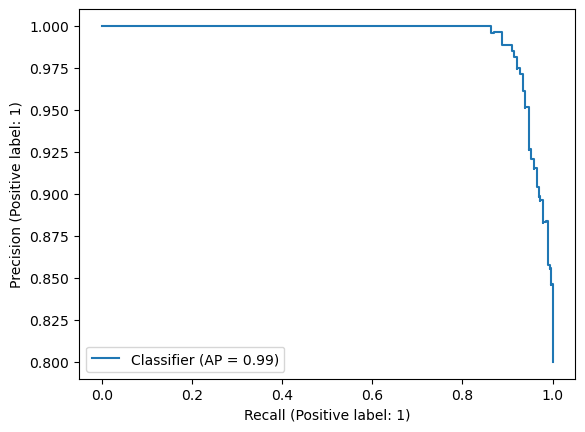

In [69]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y_true,y_pred)

<AxesSubplot: >

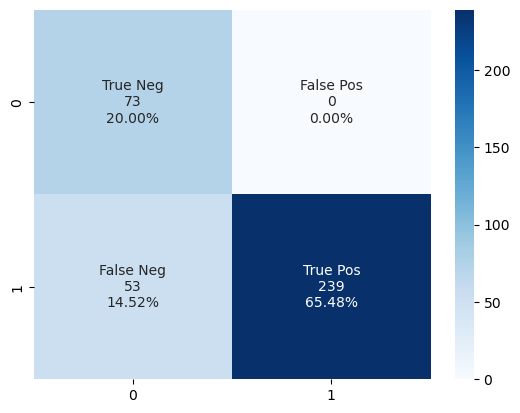

In [70]:
import seaborn as sns
cf_matrix = confusion_matrix(y_true,y_pred.round())

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [93]:
df_true = pd.DataFrame(columns = ['file_name','humans'])
df_false = pd.DataFrame(columns = ['file_name','humans'])

df_true['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/*.jpg')
df_true.humans = 1

df_false['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv3/test/false/*.jpg')
df_false.humans = 0

tiled_test = df_true.append(df_false)

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/2701866335.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiled_test = df_true.append(df_false)


In [94]:
tiled_test['humans'] = tiled_test.humans.apply(lambda x: str(x))

In [95]:
IMG_SIZE = 224

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [96]:
def predicter(file_path):
    
    #print(file_path)
    im = Image.open(file_path)
    test_input = np.array(im, dtype=np.uint8)
    if len(test_input.shape) == 3:
        test_input = resize_and_rescale(test_input)
        out = model(tf.reshape(test_input,(1,224,224,3)))

        return np.array(out)[0][0] 
    else:
        return 'out_of_shape'

In [97]:
tiled_test

,file_name,humans
0,/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a...,1
1,/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r...,1
2,/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c...,1
3,/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/d...,1
4,/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a...,1
...,...,...
11210,/Users/krish/ljmu/1.data/afo/tiledv2/test/fals...,0
11211,/Users/krish/ljmu/1.data/afo/tiledv2/test/fals...,0
11212,/Users/krish/ljmu/1.data/afo/tiledv2/test/fals...,0
11213,/Users/krish/ljmu/1.data/afo/tiledv2/test/fals...,0


In [98]:
tiled_test['prediction'] = tiled_test.file_name.apply(predicter)

In [112]:
tiled_test['humans'] = tiled_test.humans.apply(lambda x:int(x)) 

In [113]:
y_true = tiled_test.iloc[:]['humans'].values
y_pred = tiled_test.iloc[:]['prediction'].values

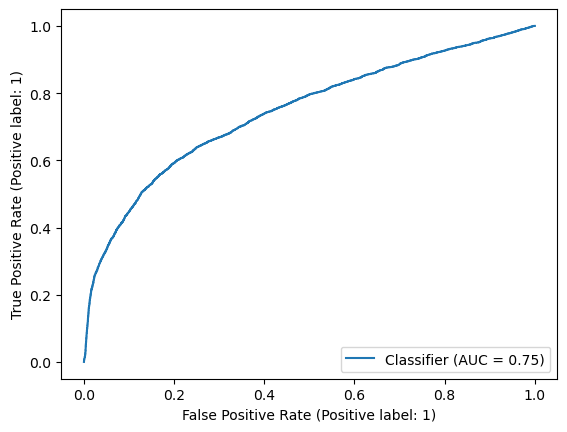

In [114]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_true, y_pred)

In [115]:
from sklearn.metrics import confusion_matrix
print('confusion',confusion_matrix(y_true,y_pred.round()))

from sklearn.metrics import recall_score
print('recall',recall_score(y_true,y_pred.round()))

from sklearn.metrics import precision_score
print('precision',precision_score(y_true,y_pred.round()))

confusion [[8372 2843]
 [1614 2874]]
recall 0.6403743315508021
precision 0.5027112121742172


**model2**

In [147]:
df_true = pd.DataFrame(columns = ['file_name','humans'])
df_false = pd.DataFrame(columns = ['file_name','humans'])

df_true['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/*.jpg')
df_true.humans = 1

df_false['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv2/test/false/*.jpg')
df_false.humans = 0

tiled_test = df_true.append(df_false)

tiled_test['humans'] = tiled_test.humans.apply(lambda x: str(x))

model2 = tf.keras.models.load_model(result_root+'19112022-1728-ResNet+tile+augmentation_10epochs_afo')

def predicter(file_path):
    
    #print(file_path)
    im = Image.open(file_path)
    test_input = np.array(im, dtype=np.uint8)
    if len(test_input.shape) == 3:
        test_input = resize_and_rescale(test_input)
        out = model2(tf.reshape(test_input,(1,224,224,3)))

        return np.array(out)[0][0] 
    else:
        return 'out_of_shape'
    
tiled_test['prediction'] = tiled_test.file_name.apply(predicter)

tiled_test['humans'] = tiled_test.humans.apply(lambda x:int(x)) 
tiled_test.to_csv(result_root+'19112022-1728-ResNet+tile+augmentation_10epochs_afo/test_prediction.csv')
y_true = tiled_test.iloc[:]['humans'].values
y_pred = tiled_test.iloc[:]['prediction'].values

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1000422756.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiled_test = df_true.append(df_false)


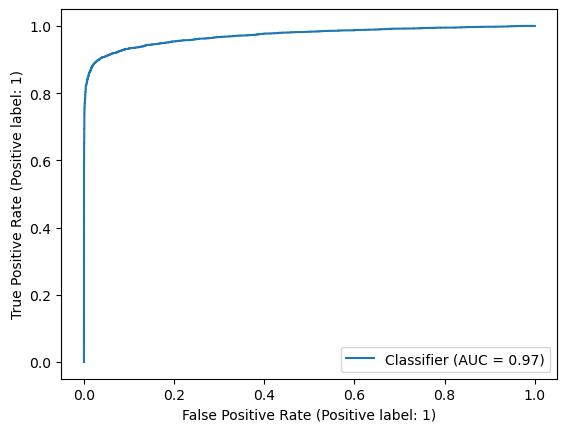

In [118]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_true, y_pred)

In [119]:
from sklearn.metrics import confusion_matrix
print('confusion',confusion_matrix(y_true,y_pred.round()))

from sklearn.metrics import recall_score
print('recall',recall_score(y_true,y_pred.round()))

from sklearn.metrics import precision_score
print('precision',precision_score(y_true,y_pred.round()))

confusion [[11076   139]
 [  620  3868]]
recall 0.8618538324420677
precision 0.9653107062640379


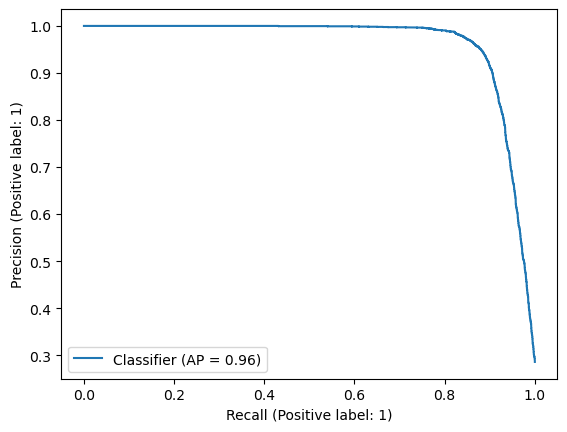

In [148]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y_true,y_pred)

**model3**


In [128]:
df_true = pd.DataFrame(columns = ['file_name','humans'])
df_false = pd.DataFrame(columns = ['file_name','humans'])

df_true['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/*.jpg')
df_true.humans = 1

df_false['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv2/test/false/*.jpg')
df_false.humans = 0

tiled_test = df_true.append(df_false)

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/2701866335.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiled_test = df_true.append(df_false)


In [129]:
tiled_test['humans'] = tiled_test.humans.apply(lambda x: str(x))

In [130]:
IMG_SIZE = 224

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [131]:
def predicter(file_path):
    
    #print(file_path)
    im = Image.open(file_path)
    test_input = np.array(im, dtype=np.uint8)
    if len(test_input.shape) == 3:
        test_input = resize_and_rescale(test_input)
        out = model3(tf.reshape(test_input,(1,224,224,3)))

        return np.array(out)[0][0] 
    else:
        return 'out_of_shape'

In [132]:
tiled_test

,file_name,humans
0,/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a...,1
1,/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r...,1
2,/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c...,1
3,/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/d...,1
4,/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a...,1
...,...,...
11210,/Users/krish/ljmu/1.data/afo/tiledv2/test/fals...,0
11211,/Users/krish/ljmu/1.data/afo/tiledv2/test/fals...,0
11212,/Users/krish/ljmu/1.data/afo/tiledv2/test/fals...,0
11213,/Users/krish/ljmu/1.data/afo/tiledv2/test/fals...,0


In [133]:
tiled_test['prediction'] = tiled_test.file_name.apply(predicter)

In [134]:
tiled_test['humans'] = tiled_test.humans.apply(lambda x:int(x)) 

In [135]:
y_true = tiled_test.iloc[:]['humans'].values
y_pred = tiled_test.iloc[:]['prediction'].values

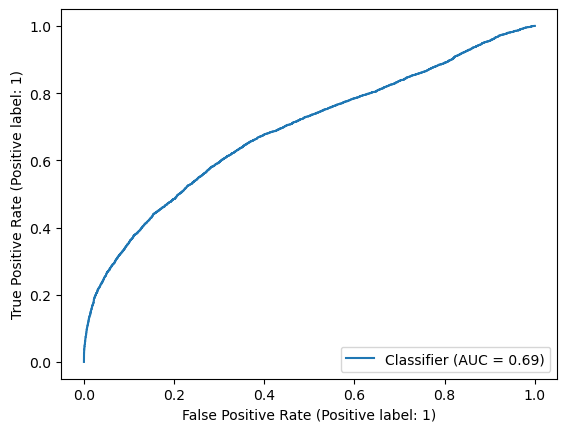

In [136]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_true, y_pred)

In [137]:
from sklearn.metrics import confusion_matrix
print('confusion',confusion_matrix(y_true,y_pred.round()))

from sklearn.metrics import recall_score
print('recall',recall_score(y_true,y_pred.round()))

from sklearn.metrics import precision_score
print('precision',precision_score(y_true,y_pred.round()))

confusion [[3472 7743]
 [ 764 3724]]
recall 0.8297682709447415
precision 0.32475800122089477


In [140]:
from sklearn.metrics import precision_recall_curve
precision_recall_curve(y_true,y_pred)

(array([0.28580526, 0.28582346, 0.28584167, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        4.45632799e-04, 2.22816399e-04, 0.00000000e+00]),
 array([6.9604104e-04, 1.6842517e-03, 1.7123807e-03, ..., 9.9910921e-01,
        9.9926418e-01, 9.9952912e-01], dtype=float32))

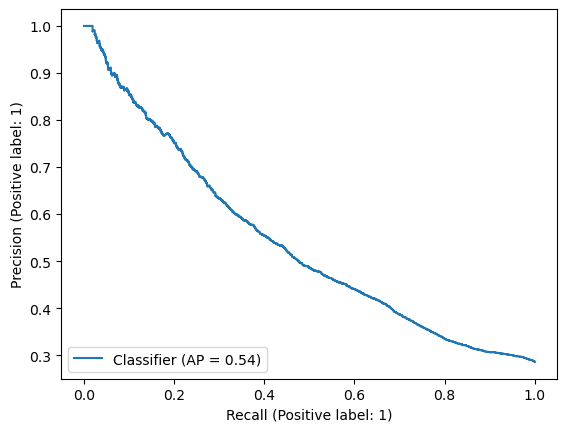

In [145]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y_true,y_pred)

In [ ]:
# https://stats.stackexchange.com/questions/360017/when-is-an-auc-score-misleadingly-high
When to Use ROC vs. Precision-Recall Curves?
Generally, the use of ROC curves and precision-recall curves are as follows:

ROC curves should be used when there are roughly equal numbers of observations for each class.
Precision-Recall curves should be used when there is a moderate to large class imbalance.
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/#:~:text=ROC%20curves%20are%20appropriate%20when,are%20appropriate%20for%20imbalanced%20datasets.

In [6]:
import sys  
sys.path.insert(0, r'/Users/krish/ljmu/2.code')

import test_modular as th

In [8]:
th.tester()

hi da
